# This goal of this notebook is to dive into early data analysis and explore features. The following Hypothesis will be explored explicitly

This notebook will primarily focus on price of the house as the overall goal is eventually to predict a price

1. Location has an affect on price
2. As size increases for the housing unit, so does the price
3. number of beds has an affect on price, likely a price increase
4. number of bathrooms has an affect on price, likely an increase in price
5. Different classes of property types will have different prices (vague I know, but hard to get specific with multiple property types)

# Importing libraries and double checking data quality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import plotly.express as px

In [2]:
df = pd.read_csv('MN_cleaned.csv')
df.head()

Unnamed: 0              PROPERTY TYPE                       ADDRESS  \
0           1                  Townhouse  1006 Van White Memorial Blvd   
1           2                Condo/Co-op          1211 Lagoon Ave #410   
2           3  Single Family Residential              9532 Yosemite Rd   
3           4                Condo/Co-op     3251 Louisiana Ave S #201   
4           5                  Townhouse             1315 Douglas Dr N   

               CITY  ZIP OR POSTAL CODE     PRICE  BEDS  BATHS  \
0       Minneapolis             55411.0  334900.0   3.0    3.0   
1       Minneapolis             55408.0  219900.0   1.0    1.0   
2       Bloomington             55437.0  649900.0   4.0    5.0   
3  Saint Louis Park             55426.0  424900.0   2.0    2.0   
4     Golden Valley             55422.0  280000.0   3.0    2.0   

            LOCATION  SQUARE FEET  LOT SIZE  YEAR BUILT  DAYS ON MARKET  \
0  Sumner - Glenwood       1505.0    1306.0        2015               1   
1    Lowry Hill East        818.0   23391.0        2006               4   
2        Bloomington       3492.0   19166.0        1974              15   
3   Saint Louis Park       1670.0  126890.0        2007              36   
4      Golden Valley       1364.0  139304.0        1966              44   

   $/SQUARE FEET  HOA/MONTH       MLS#   LATITUDE  LONGITUDE  
0          223.0      279.0  6678953.0  44.988599 -93.291941  
1          269.0      376.0  6762787.0  44.948981 -93.294965  
2          186.0        0.0  6752088.0  44.830344 -93.355163  
3          254.0      811.0  6744587.0  44.942344 -93.369518  
4          205.0      375.0  6739597.0  44.993391 -93.360514

In [3]:
# will drop unamed column
df = df.drop('Unnamed: 0', axis=1)
df.head()

PROPERTY TYPE                       ADDRESS              CITY  \
0                  Townhouse  1006 Van White Memorial Blvd       Minneapolis   
1                Condo/Co-op          1211 Lagoon Ave #410       Minneapolis   
2  Single Family Residential              9532 Yosemite Rd       Bloomington   
3                Condo/Co-op     3251 Louisiana Ave S #201  Saint Louis Park   
4                  Townhouse             1315 Douglas Dr N     Golden Valley   

   ZIP OR POSTAL CODE     PRICE  BEDS  BATHS           LOCATION  SQUARE FEET  \
0             55411.0  334900.0   3.0    3.0  Sumner - Glenwood       1505.0   
1             55408.0  219900.0   1.0    1.0    Lowry Hill East        818.0   
2             55437.0  649900.0   4.0    5.0        Bloomington       3492.0   
3             55426.0  424900.0   2.0    2.0   Saint Louis Park       1670.0   
4             55422.0  280000.0   3.0    2.0      Golden Valley       1364.0   

   LOT SIZE  YEAR BUILT  DAYS ON MARKET  $/SQUARE FEET  HOA/MONTH       MLS#  \
0    1306.0        2015               1          223.0      279.0  6678953.0   
1   23391.0        2006               4          269.0      376.0  6762787.0   
2   19166.0        1974              15          186.0        0.0  6752088.0   
3  126890.0        2007              36          254.0      811.0  6744587.0   
4  139304.0        1966              44          205.0      375.0  6739597.0   

    LATITUDE  LONGITUDE  
0  44.988599 -93.291941  
1  44.948981 -93.294965  
2  44.830344 -93.355163  
3  44.942344 -93.369518  
4  44.993391 -93.360514

In [4]:
# double check Nans
df.isnull().sum()

PROPERTY TYPE         0
ADDRESS               0
CITY                  0
ZIP OR POSTAL CODE    0
PRICE                 0
BEDS                  0
BATHS                 0
LOCATION              0
SQUARE FEET           0
LOT SIZE              0
YEAR BUILT            0
DAYS ON MARKET        0
$/SQUARE FEET         0
HOA/MONTH             0
MLS#                  0
LATITUDE              0
LONGITUDE             0
dtype: int64

In [5]:
# Nothing null, now will check for dtypes
df.dtypes
# dtypes looks good

PROPERTY TYPE          object
ADDRESS                object
CITY                   object
ZIP OR POSTAL CODE    float64
PRICE                 float64
BEDS                  float64
BATHS                 float64
LOCATION               object
SQUARE FEET           float64
LOT SIZE              float64
YEAR BUILT              int64
DAYS ON MARKET          int64
$/SQUARE FEET         float64
HOA/MONTH             float64
MLS#                  float64
LATITUDE              float64
LONGITUDE             float64
dtype: object

In [6]:
df.describe()

ZIP OR POSTAL CODE         PRICE        BEDS       BATHS  SQUARE FEET  \
count          686.000000  6.860000e+02  686.000000  686.000000   686.000000   
mean         55265.983965  3.978991e+05    3.204082    2.099125  1822.934402   
std            155.208731  2.940780e+05    1.396256    1.013240   904.465112   
min          55101.000000  6.490000e+04    0.000000    1.000000    40.000000   
25%          55106.000000  2.499000e+05    2.000000    1.000000  1217.000000   
50%          55401.000000  3.300000e+05    3.000000    2.000000  1698.000000   
75%          55417.000000  4.500000e+05    4.000000    3.000000  2164.000000   
max          55445.000000  2.875000e+06   14.000000   12.000000  8295.000000   

            LOT SIZE   YEAR BUILT  DAYS ON MARKET  $/SQUARE FEET    HOA/MONTH  \
count     686.000000   686.000000      686.000000     686.000000   686.000000   
mean    17685.246356  1948.666181        9.641399     221.559767   178.634111   
std     67636.413477    38.662427       10.258255     101.023066   355.140332   
min         0.000000  1864.000000        1.000000      60.000000     0.000000   
25%      4033.250000  1913.250000        2.000000     167.000000     0.000000   
50%      5983.500000  1952.000000        7.000000     204.000000     0.000000   
75%     10890.000000  1981.000000       15.000000     254.000000   314.500000   
max    871025.000000  2026.000000       92.000000    1748.000000  3218.000000   

               MLS#    LATITUDE   LONGITUDE  
count  6.860000e+02  686.000000  686.000000  
mean   6.753570e+06   44.967501  -93.198677  
std    1.403131e+04    0.064830    0.117674  
min    6.635160e+06   44.796175  -93.406654  
25%    6.750806e+06   44.933817  -93.298568  
50%    6.757747e+06   44.958463  -93.213797  
75%    6.761603e+06   44.989482  -93.095233  
max    6.765445e+06   45.149058  -92.954192

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PROPERTY TYPE       686 non-null    object 
 1   ADDRESS             686 non-null    object 
 2   CITY                686 non-null    object 
 3   ZIP OR POSTAL CODE  686 non-null    float64
 4   PRICE               686 non-null    float64
 5   BEDS                686 non-null    float64
 6   BATHS               686 non-null    float64
 7   LOCATION            686 non-null    object 
 8   SQUARE FEET         686 non-null    float64
 9   LOT SIZE            686 non-null    float64
 10  YEAR BUILT          686 non-null    int64  
 11  DAYS ON MARKET      686 non-null    int64  
 12  $/SQUARE FEET       686 non-null    float64
 13  HOA/MONTH           686 non-null    float64
 14  MLS#                686 non-null    float64
 15  LATITUDE            686 non-null    float64
 16  LONGITUD

# General Feature Relationship Exploration

In [8]:
# need to identify numeric columns
num_df = df.select_dtypes(include=[np.number])
# will remove zip and MLS# from numeric values as they are more descriptors than anything
num_df = num_df.drop(['ZIP OR POSTAL CODE', 'MLS#'], axis=1)
num_df.head()

PRICE  BEDS  BATHS  SQUARE FEET  LOT SIZE  YEAR BUILT  DAYS ON MARKET  \
0  334900.0   3.0    3.0       1505.0    1306.0        2015               1   
1  219900.0   1.0    1.0        818.0   23391.0        2006               4   
2  649900.0   4.0    5.0       3492.0   19166.0        1974              15   
3  424900.0   2.0    2.0       1670.0  126890.0        2007              36   
4  280000.0   3.0    2.0       1364.0  139304.0        1966              44   

   $/SQUARE FEET  HOA/MONTH   LATITUDE  LONGITUDE  
0          223.0      279.0  44.988599 -93.291941  
1          269.0      376.0  44.948981 -93.294965  
2          186.0        0.0  44.830344 -93.355163  
3          254.0      811.0  44.942344 -93.369518  
4          205.0      375.0  44.993391 -93.360514

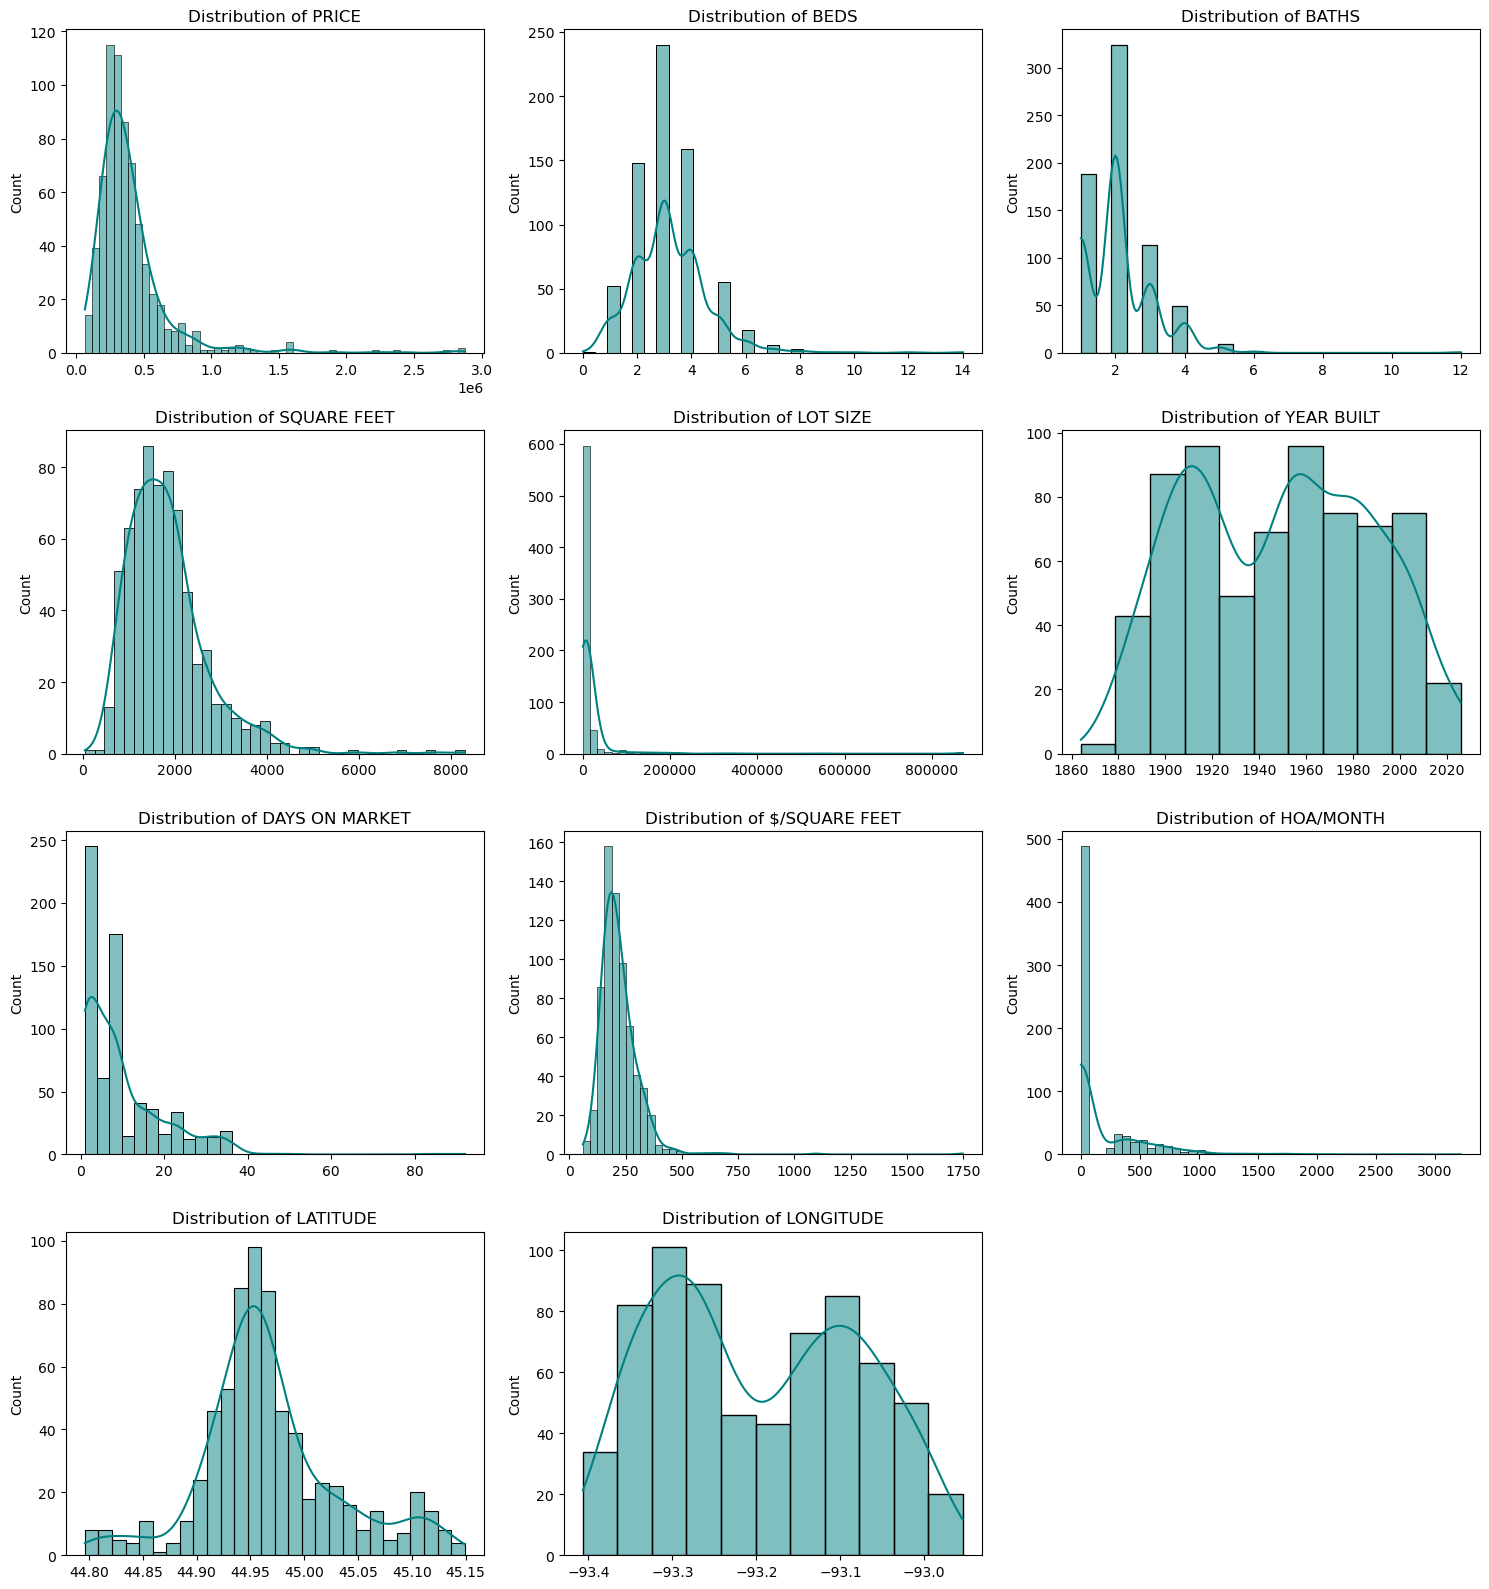

In [9]:
# Will create histograms for all values to look at distribution
colms_to_plot = num_df.columns
n_colms = 3
n_rows = ((len(colms_to_plot) // n_colms)+1)

fig, ax = plt.subplots(n_rows, n_colms, figsize=(15, n_rows * 4))
ax = ax.flatten()

for i, col in enumerate(colms_to_plot):
    sns.histplot(num_df[col], ax=ax[i], kde=True, color='teal')
    ax[i].set_title(f'Distribution of {col}', fontsize=12)
    ax[i].set_xlabel('')

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

Notes:
1. Price has a nice fairly normal distribution with a right skew. This is fairly expected as there will be some houses that are VERY expensive.
2. Beds and Baths are more integers and so they are more like categories. It looks like they are both right skewed with the average house having more rooms than baths.
3. SQ feet distribution looks fairly normal with a right skew
4. There is a large amount of lot sizes that are at 0. This likely is due to specific condos or apartments that aren't on a plot of land.
5. The year built range is fairly equal
6. The distribution of of days on market is similar to a log decay
7. $/SQ foot is similar to SQ feet, but a tighter distribution than SQ feet
8. latitude and longitude peaks are likely due to mineapolis and other cities where you'll have a dense housing market

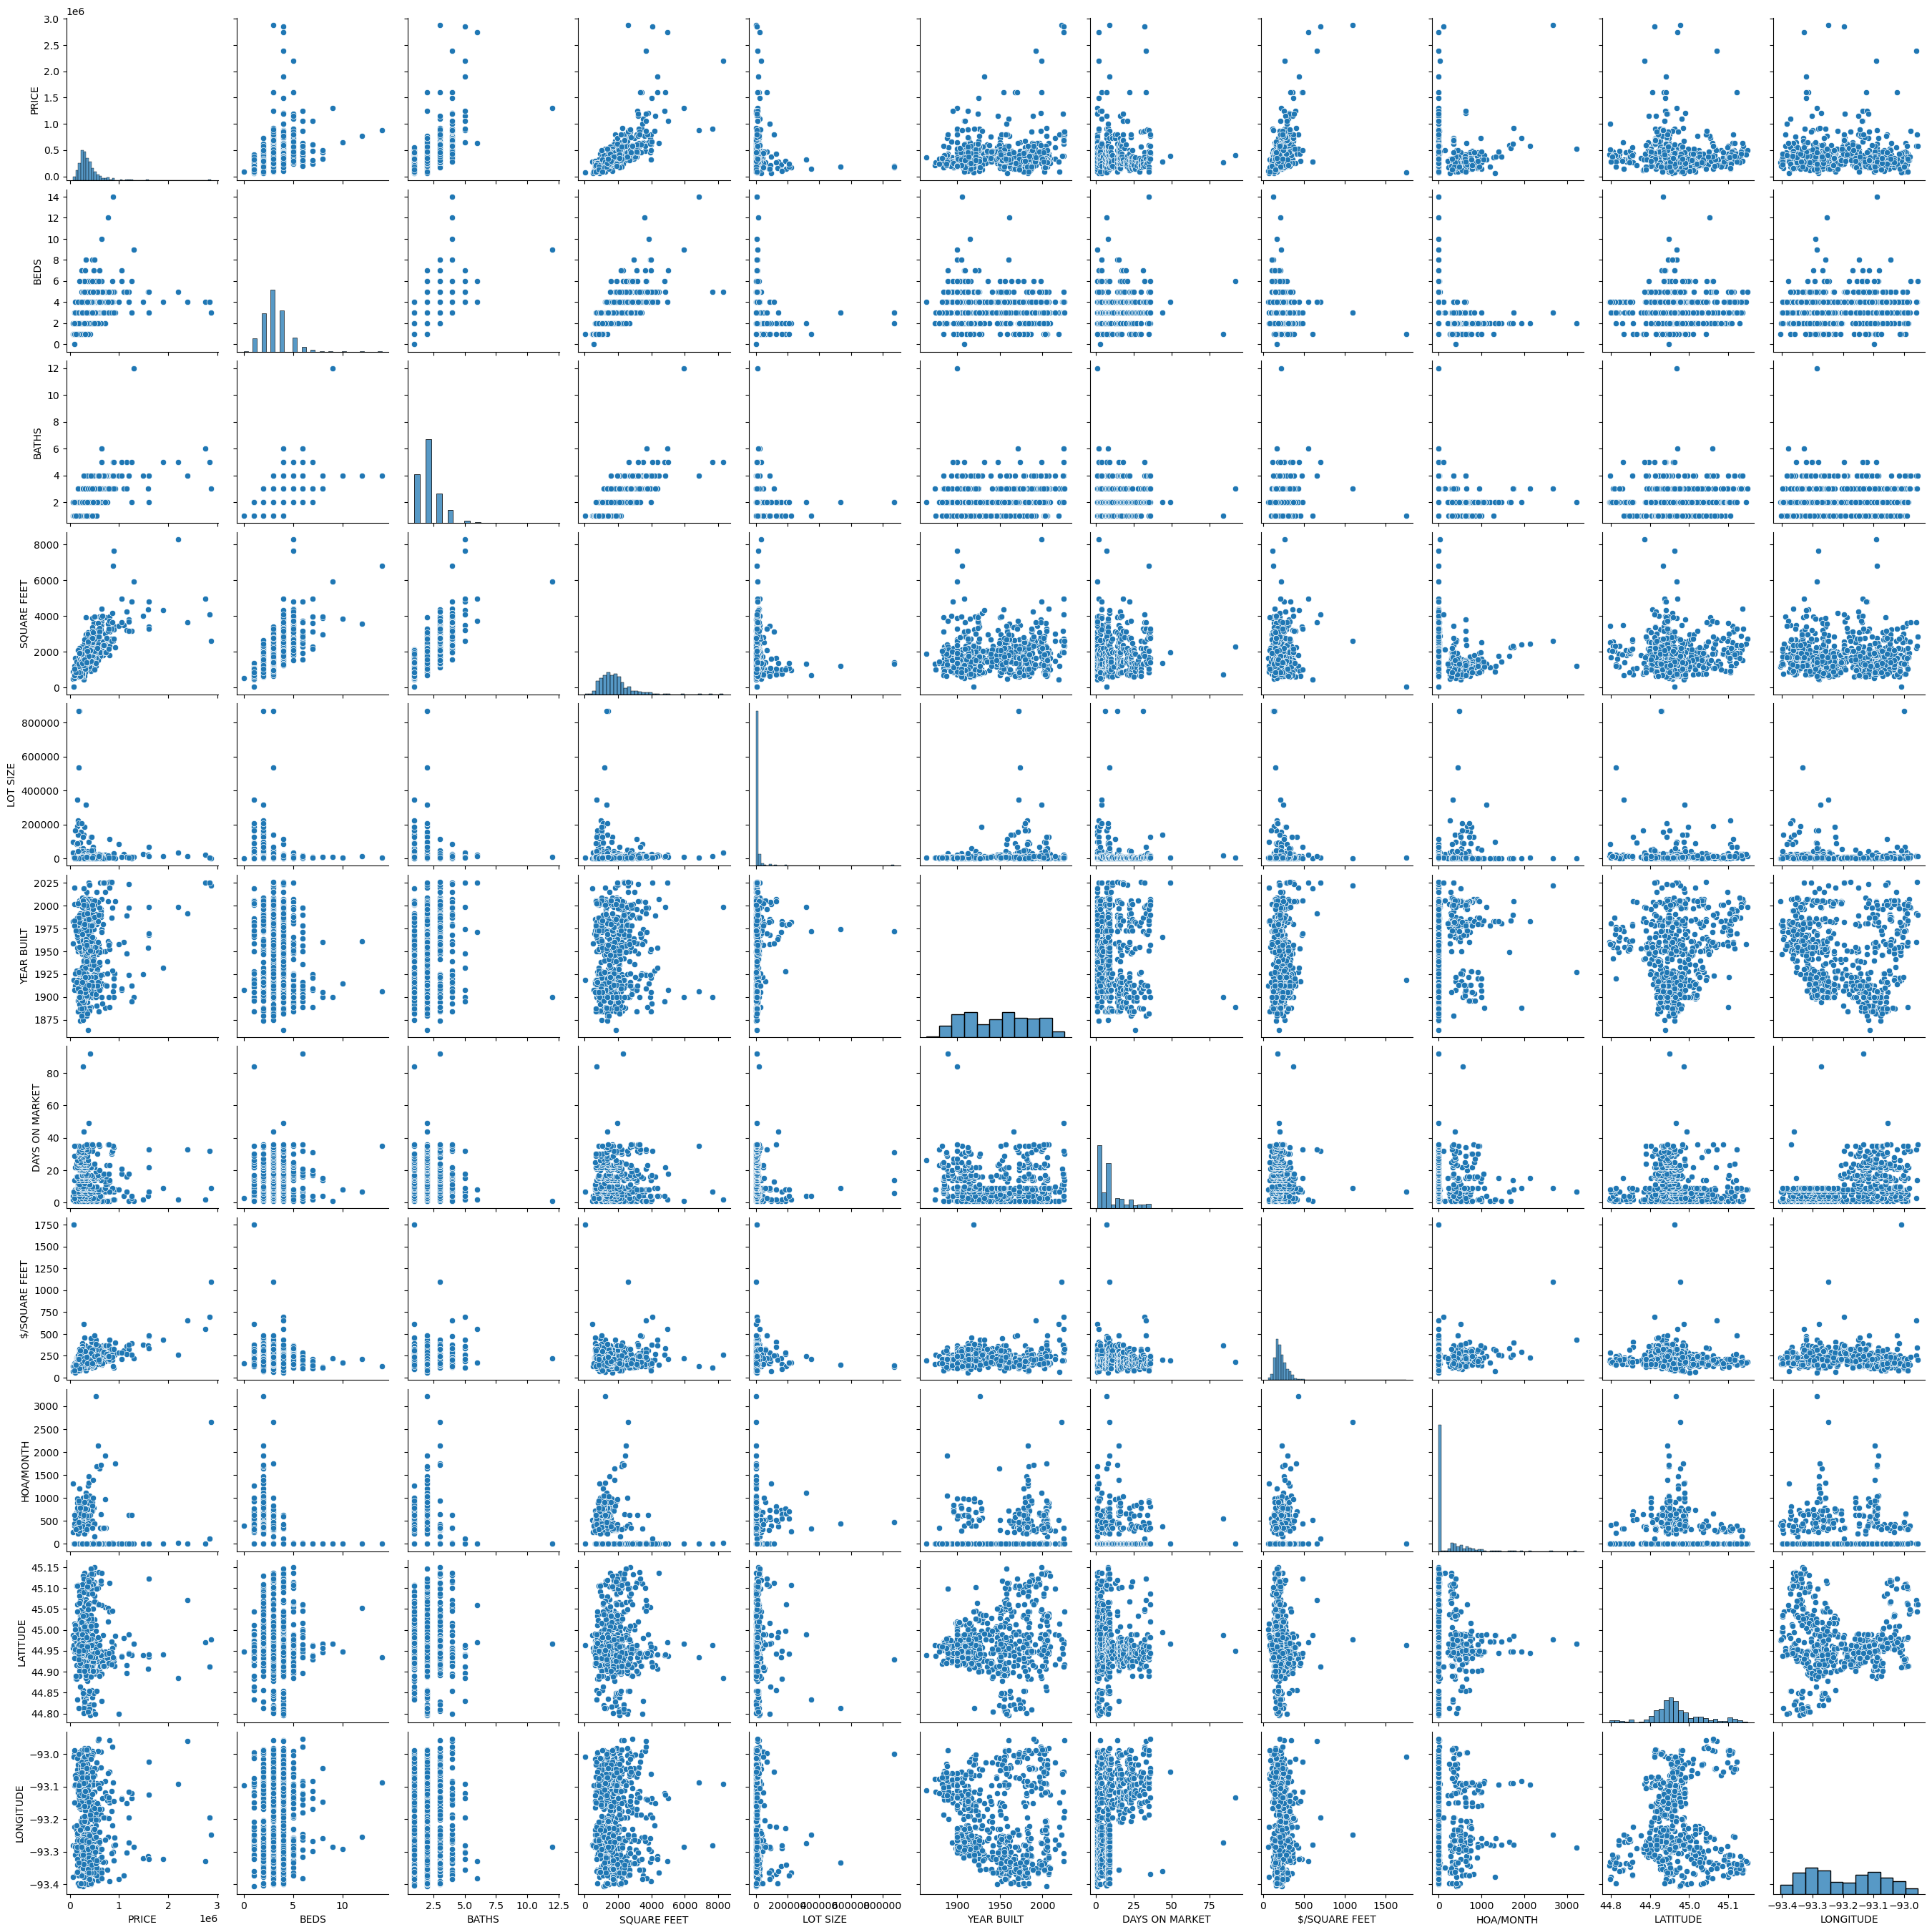

In [10]:
# Looking at correlations and histograms
sns.pairplot(num_df)
plt.show()

Notes:
1. Price seems to be correlated with Beds, Baths, SQ feet, $/SQ feet, HOA/Month
2. HOA/Month as long as the HOA/month is >0
3. Price, Beds, Baths, SQfeet, $/SQfeet seem to all be correlated

In [11]:
# Need to prepare a correlation df for heatmap
corr_df = num_df.corr()

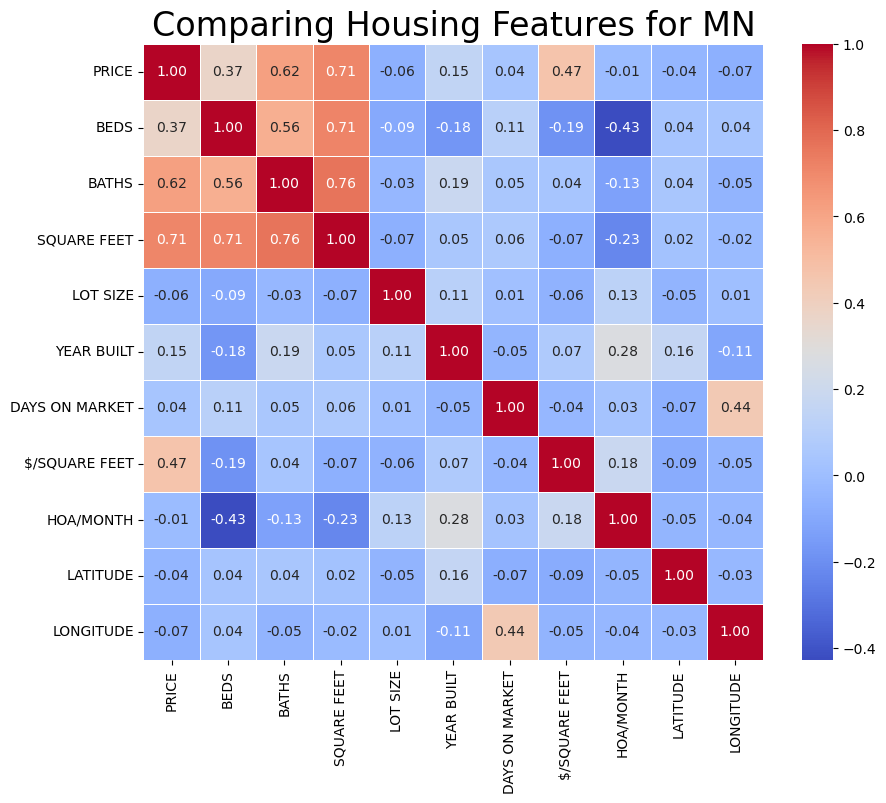

In [12]:
# Creating a heatmap to check out correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Comparing Housing Features for MN', fontsize=24)
plt.show()

Note: Interestingly, the longitude and days on market seem to be correlated. This may be as you go further north, the less people want to live there. Minneapolis is roughly ~25% up from the south end of the state, so this may have an effect.

# Features of interest

1. HOA/Month
2. Beds
3. Baths
4. SQ Feet
5. $/ SQ Feet

# HOA Comparison to Price

In [13]:
# What if HOA/month did was correlated with price if the HOA/month >0? Is it true?

HOA_df = df[df['HOA/MONTH'] >0]
HOA_df.head()

PROPERTY TYPE                       ADDRESS              CITY  \
0     Townhouse  1006 Van White Memorial Blvd       Minneapolis   
1   Condo/Co-op          1211 Lagoon Ave #410       Minneapolis   
3   Condo/Co-op     3251 Louisiana Ave S #201  Saint Louis Park   
4     Townhouse             1315 Douglas Dr N     Golden Valley   
5   Condo/Co-op             400 N 1st St #613       Minneapolis   

   ZIP OR POSTAL CODE     PRICE  BEDS  BATHS           LOCATION  SQUARE FEET  \
0             55411.0  334900.0   3.0    3.0  Sumner - Glenwood       1505.0   
1             55408.0  219900.0   1.0    1.0    Lowry Hill East        818.0   
3             55426.0  424900.0   2.0    2.0   Saint Louis Park       1670.0   
4             55422.0  280000.0   3.0    2.0      Golden Valley       1364.0   
5             55401.0  265000.0   1.0    1.0         North Loop        723.0   

   LOT SIZE  YEAR BUILT  DAYS ON MARKET  $/SQUARE FEET  HOA/MONTH       MLS#  \
0    1306.0        2015               1          223.0      279.0  6678953.0   
1   23391.0        2006               4          269.0      376.0  6762787.0   
3  126890.0        2007              36          254.0      811.0  6744587.0   
4  139304.0        1966              44          205.0      375.0  6739597.0   
5   18861.0        1900              84          367.0      556.0  6711998.0   

    LATITUDE  LONGITUDE  
0  44.988599 -93.291941  
1  44.948981 -93.294965  
3  44.942344 -93.369518  
4  44.993391 -93.360514  
5  44.987329 -93.271224

In [14]:
HOA_df.info()
# 207/686 or 30.17% of samples have an HOA/month value

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, 0 to 684
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PROPERTY TYPE       207 non-null    object 
 1   ADDRESS             207 non-null    object 
 2   CITY                207 non-null    object 
 3   ZIP OR POSTAL CODE  207 non-null    float64
 4   PRICE               207 non-null    float64
 5   BEDS                207 non-null    float64
 6   BATHS               207 non-null    float64
 7   LOCATION            207 non-null    object 
 8   SQUARE FEET         207 non-null    float64
 9   LOT SIZE            207 non-null    float64
 10  YEAR BUILT          207 non-null    int64  
 11  DAYS ON MARKET      207 non-null    int64  
 12  $/SQUARE FEET       207 non-null    float64
 13  HOA/MONTH           207 non-null    float64
 14  MLS#                207 non-null    float64
 15  LATITUDE            207 non-null    float64
 16  LONGITUDE    

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['PRICE'], df['HOA/MONTH'])
r2 = r_value**2
print('----Full Dataset HOA vs Price----')
print('Slope: {:,.2f}; Intercept: {:,.2f}; R-value: {:.3f}; P-value: {:.4e}; Std_Err: {:.2f}; R^2: {:.3f}'
      .format(slope, intercept, r_value, p_value, std_err, r2))

----Full Dataset HOA vs Price----
Slope: -0.00; Intercept: 183.34; R-value: -0.010; P-value: 7.9805e-01; Std_Err: 0.00; R^2: 0.000


In [16]:
slope, intercept, r_value, p_value, std_err = stats.linregress(HOA_df['PRICE'], HOA_df['HOA/MONTH'])
r2 = r_value**2
print('----HOA Dataset HOA vs Price----')
print('Slope: {:,.2f}; Intercept: {:,.2f}; R-value: {:.3f}; P-value: {:.4e}; Std_Err: {:.2f}; R^2: {:.3f}'
      .format(slope, intercept, r_value, p_value, std_err, r2))

----HOA Dataset HOA vs Price----
Slope: 0.00; Intercept: 502.81; R-value: 0.209; P-value: 2.5426e-03; Std_Err: 0.00; R^2: 0.044


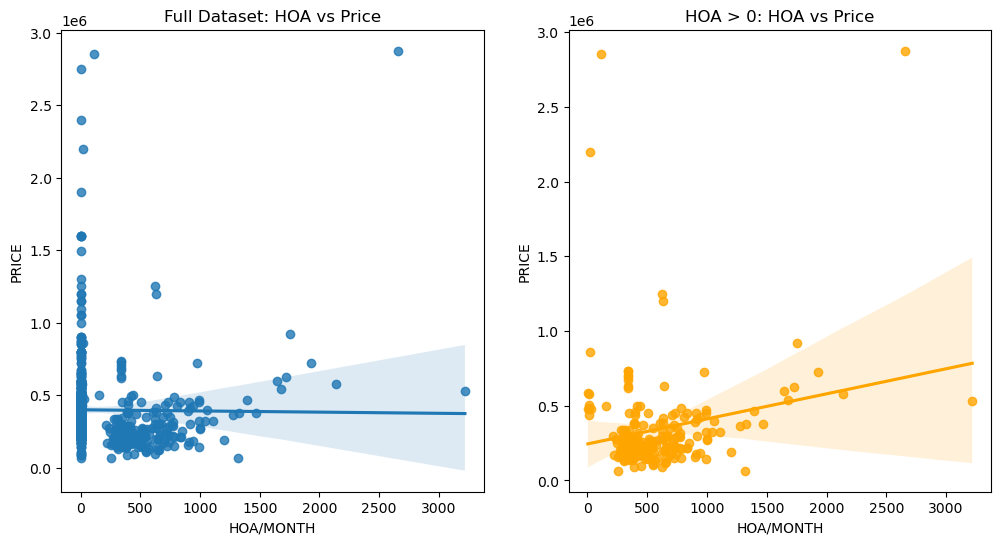

In [17]:
# Comparing HOA with and without 0 values

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 6))
sns.regplot(x=df['HOA/MONTH'], y=df['PRICE'], data=df, ax=ax1)
ax1.set_title('Full Dataset: HOA vs Price')
sns.regplot(x=HOA_df['HOA/MONTH'], y=HOA_df['PRICE'], data=HOA_df, ax=ax2, color = 'orange')
ax2.set_title('HOA > 0: HOA vs Price')
plt.show()

Notes: This was a good check. It looks like there might be a tiny correlation, but nothing to reawlly go off of here. 

# SQ Feet and $/SQ Feet comparison to Price

In [18]:
# Looking correlation between Price and SQ Feet
slope, intercept, r_value, p_value, std_err = stats.linregress(df['PRICE'], df['SQUARE FEET'])
r2 = r_value**2
print('----Full Dataset SQ Feet vs Price----')
print('Slope: {:,.2f}; Intercept: {:,.2f}; R-value: {:.3f}; P-value: {:.4e}; Std_Err: {:.2f}; R^2: {:.3f}'
      .format(slope, intercept, r_value, p_value, std_err, r2))

----Full Dataset SQ Feet vs Price----
Slope: 0.00; Intercept: 954.51; R-value: 0.710; P-value: 4.1279e-106; Std_Err: 0.00; R^2: 0.504


In [19]:
# Looking correlation between Price and $/SQ Feet
slope, intercept, r_value, p_value, std_err = stats.linregress(df['PRICE'], df['$/SQUARE FEET'])
r2 = r_value**2
print('----Full Dataset $/SQ Feet vs Price----')
print('Slope: {:,.2f}; Intercept: {:,.2f}; R-value: {:.3f}; P-value: {:.4e}; Std_Err: {:.2f}; R^2: {:.3f}'
      .format(slope, intercept, r_value, p_value, std_err, r2))

----Full Dataset $/SQ Feet vs Price----
Slope: 0.00; Intercept: 157.50; R-value: 0.469; P-value: 9.5605e-39; Std_Err: 0.00; R^2: 0.220


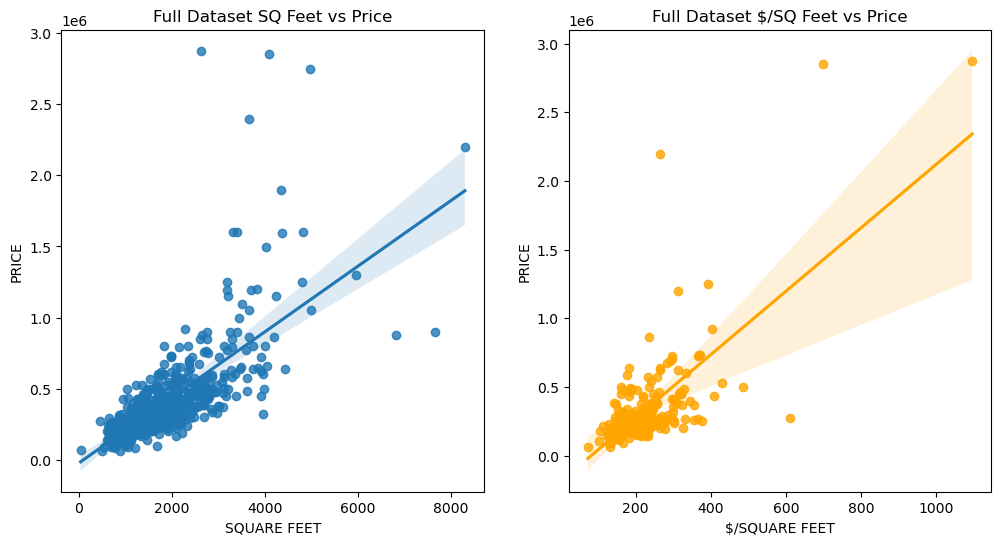

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 6))
sns.regplot(x=df['SQUARE FEET'], y=df['PRICE'], data=df, ax=ax1)
ax1.set_title('Full Dataset SQ Feet vs Price')
sns.regplot(x=HOA_df['$/SQUARE FEET'], y=HOA_df['PRICE'], data=HOA_df, ax=ax2, color = 'orange')
ax2.set_title('Full Dataset $/SQ Feet vs Price')
plt.show()

Notes:
The slopes are 0 because of the large scale on the X axis. 
The R^2 is much better (0.5 vs 0.2) for square feet. This would make some sensse as the dollar/SQ feet value is an already adjust value using Price and square feet. Moving forward, it may be better to remove the dollat/sq feet feature before model fitting.

The p values for both fits are far less than 0.00001, so it looks like these correlations with price is real. 

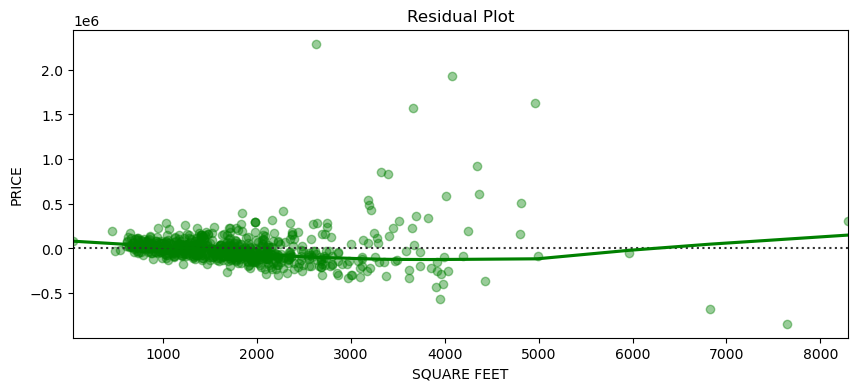

In [21]:
# Residual plot to make sure no underlying curve is being missed
plt.figure(figsize=(10, 4))
sns.residplot(x=df['SQUARE FEET'], y=df['PRICE'], lowess=True, color="g", scatter_kws={'alpha': 0.4})
plt.title('Residual Plot')
plt.show()

Summary: The correlation between SQ feet and price is real (p < 0.0001, R^2 = 0.504) and there may be a slight curve in the residuals being missed, but it looks like most data is linear.

Note: There will likely be a colinearity with Beds and Baths. This should be thoguht about when modeling.

# Beds and Baths Comparison with Price

Beds and baths each of specific quantitites and will likely have a price range within each quantity. 

In [22]:
df['BEDS'].value_counts().sort_values(ascending=False)
# as expected, most valeus are 1-6 beds. 

BEDS
3.0     240
4.0     159
2.0     148
5.0      55
1.0      52
6.0      18
7.0       6
8.0       3
9.0       1
12.0      1
10.0      1
0.0       1
14.0      1
Name: count, dtype: int64

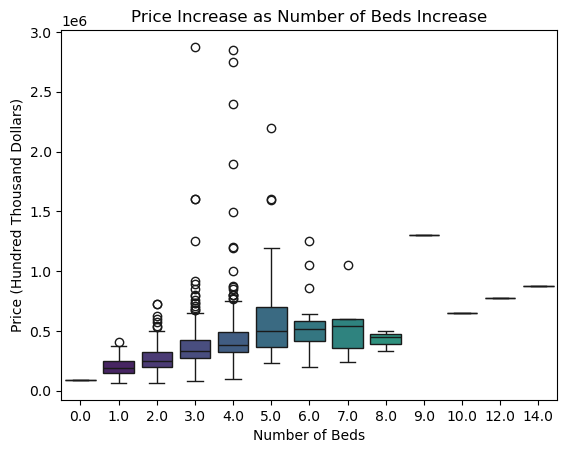

In [23]:
sns.boxplot(y=df['PRICE'], x=df['BEDS'], palette='viridis', hue=df['BEDS'], legend=False)
plt.title('Price Increase as Number of Beds Increase')
plt.xlabel('Number of Beds')
plt.ylabel('Price (Hundred Thousand Dollars)')
plt.show()

So far it does look like there is a correlation between beds and price. In order to further test this hypothesis, we need a way to look at the higher bed counts a little better. To move forward, 3 bins will be added, <=2, 3-5, >5.  

In [24]:
bed_bins = []
for bed in df['BEDS']:
    if bed <= 2:
        bed_bins.append('<3 Beds')
    elif bed > 5:
        bed_bins.append('>5 Beds')
    else:
        bed_bins.append('3-5 Beds')

df['BED_BIN'] = bed_bins
df.head()

PROPERTY TYPE                       ADDRESS              CITY  \
0                  Townhouse  1006 Van White Memorial Blvd       Minneapolis   
1                Condo/Co-op          1211 Lagoon Ave #410       Minneapolis   
2  Single Family Residential              9532 Yosemite Rd       Bloomington   
3                Condo/Co-op     3251 Louisiana Ave S #201  Saint Louis Park   
4                  Townhouse             1315 Douglas Dr N     Golden Valley   

   ZIP OR POSTAL CODE     PRICE  BEDS  BATHS           LOCATION  SQUARE FEET  \
0             55411.0  334900.0   3.0    3.0  Sumner - Glenwood       1505.0   
1             55408.0  219900.0   1.0    1.0    Lowry Hill East        818.0   
2             55437.0  649900.0   4.0    5.0        Bloomington       3492.0   
3             55426.0  424900.0   2.0    2.0   Saint Louis Park       1670.0   
4             55422.0  280000.0   3.0    2.0      Golden Valley       1364.0   

   LOT SIZE  YEAR BUILT  DAYS ON MARKET  $/SQUARE FEET  HOA/MONTH       MLS#  \
0    1306.0        2015               1          223.0      279.0  6678953.0   
1   23391.0        2006               4          269.0      376.0  6762787.0   
2   19166.0        1974              15          186.0        0.0  6752088.0   
3  126890.0        2007              36          254.0      811.0  6744587.0   
4  139304.0        1966              44          205.0      375.0  6739597.0   

    LATITUDE  LONGITUDE   BED_BIN  
0  44.988599 -93.291941  3-5 Beds  
1  44.948981 -93.294965   <3 Beds  
2  44.830344 -93.355163  3-5 Beds  
3  44.942344 -93.369518   <3 Beds  
4  44.993391 -93.360514  3-5 Beds

In [25]:
df['BED_BIN'].value_counts()
# would like more in the >5 beds, but unless they build more huge houses, then it won't happen.

BED_BIN
3-5 Beds    454
<3 Beds     201
>5 Beds      31
Name: count, dtype: int64

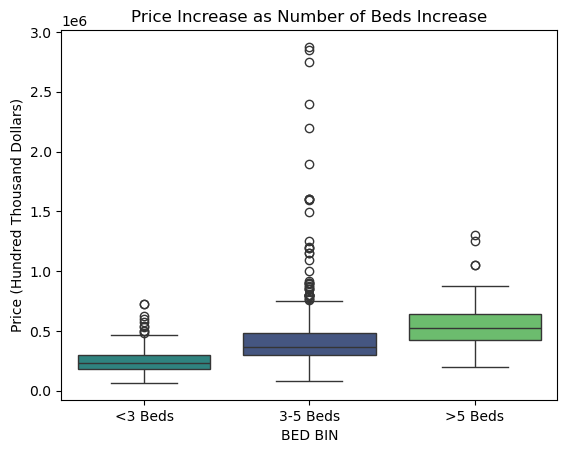

In [26]:
fixed_order_bed = ['<3 Beds', '3-5 Beds', '>5 Beds']
sns.boxplot(y=df['PRICE'], x=df['BED_BIN'], palette='viridis', hue=df['BED_BIN'], legend=False, order=fixed_order_bed)
plt.title('Price Increase as Number of Beds Increase')
plt.xlabel('BED BIN')
plt.ylabel('Price (Hundred Thousand Dollars)')
plt.show()

Looks like there may be a correlation. Linear regression is not likely the best way to look at this further. A Tukey test will be conducted to determine if there are differerences between the bins and the full bed count set. 

In [27]:
# This is a large Tukey just to look for some True values under reject. It will not be used for much anything else.
tukey = pairwise_tukeyhsd(endog=df['PRICE'], groups=df['BEDS'], alpha=0.05)            
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj      lower        upper     reject
-------------------------------------------------------------------
   0.0    1.0  106569.2308    1.0  -805185.4668 1018323.9283  False
   0.0    2.0  191380.8649    1.0  -714777.3315 1097539.0612  False
   0.0    3.0  297317.0375 0.9971  -607674.7685 1202308.8435  False
   0.0    4.0  390879.2075 0.9687  -515068.5946 1296827.0097  False
   0.0    5.0  517501.7818 0.8021  -393783.6244 1428787.1881  False
   0.0    6.0  466147.2222 0.9059  -461712.4398 1394006.8842  False
   0.0    7.0  457466.6667 0.9415  -518006.0824 1432939.4157  False
   0.0    8.0  336666.6667 0.9975  -706157.5668 1379490.9001  False
   0.0    9.0    1209900.0 0.0837   -67293.6317 2487093.6317  False
   0.0   10.0     559000.0  0.965  -718193.6317 1836193.6317  False
   0.0   12.0     685000.0 0.8577  -592193.6317 1962193.6317  False
   0.0   14.0     785000.0 0.7035  -492193.6317 

In [28]:
group1_bed = df[df['BED_BIN'] == '<3 Beds']['PRICE']
group2_bed = df[df['BED_BIN'] == '3-5 Beds']['PRICE']
group3_bed = df[df['BED_BIN'] == '>5 Beds']['PRICE']

# 2. Run the One-Way ANOVA
f_stat, p_val = stats.f_oneway(group1_bed, group2_bed, group3_bed)

print(f"F-Statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.4e}")

F-Statistic: 39.13
P-value: 8.1345e-17


In [29]:
tukey = pairwise_tukeyhsd(endog=df['PRICE'], groups=df['BED_BIN'], alpha=0.05)            
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
 group1   group2   meandiff   p-adj     lower       upper     reject
--------------------------------------------------------------------
3-5 Beds <3 Beds -188271.3657    0.0 -243783.298 -132759.4335   True
3-5 Beds >5 Beds  139510.5861 0.0198  17876.9344  261144.2378   True
 <3 Beds >5 Beds  327781.9519    0.0 201350.0223  454213.8814   True
--------------------------------------------------------------------


In [30]:
tukey = pairwise_tukeyhsd(endog=df['PRICE'], groups=df['BED_BIN'], alpha=0.01)            
print(tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.01         
 group1   group2   meandiff   p-adj     lower        upper     reject
---------------------------------------------------------------------
3-5 Beds <3 Beds -188271.3657    0.0 -257359.2377 -119183.4937   True
3-5 Beds >5 Beds  139510.5861 0.0198  -11869.6635  290890.8358  False
 <3 Beds >5 Beds  327781.9519    0.0  170429.9625  485133.9412   True
---------------------------------------------------------------------


It looks like there is an increase in price with an increase in number of beds. 


Moving on to Baths.

In [31]:
df['BATHS'].value_counts().sort_values(ascending=False)

BATHS
2.0     324
1.0     188
3.0     113
4.0      49
5.0       9
6.0       2
12.0      1
Name: count, dtype: int64

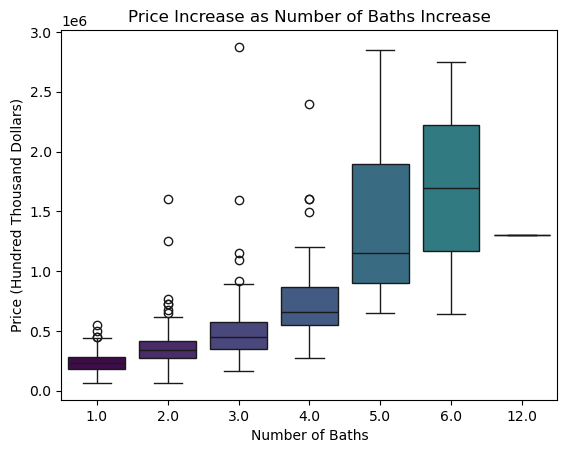

In [32]:
sns.boxplot(y=df['PRICE'], x=df['BATHS'], palette='viridis', hue=df['BATHS'], legend=False)
plt.title('Price Increase as Number of Baths Increase')
plt.xlabel('Number of Baths')
plt.ylabel('Price (Hundred Thousand Dollars)')
plt.show()

In [33]:
bath_bins = []
for bath in df['BEDS']:
    if bath <= 2:
        bath_bins.append('<3 Baths')
    elif bath > 5:
        bath_bins.append('>4 Baths')
    else:
        bath_bins.append('3-4 Baths')

df['BATH_BIN'] = bath_bins
df.head()

PROPERTY TYPE                       ADDRESS              CITY  \
0                  Townhouse  1006 Van White Memorial Blvd       Minneapolis   
1                Condo/Co-op          1211 Lagoon Ave #410       Minneapolis   
2  Single Family Residential              9532 Yosemite Rd       Bloomington   
3                Condo/Co-op     3251 Louisiana Ave S #201  Saint Louis Park   
4                  Townhouse             1315 Douglas Dr N     Golden Valley   

   ZIP OR POSTAL CODE     PRICE  BEDS  BATHS           LOCATION  SQUARE FEET  \
0             55411.0  334900.0   3.0    3.0  Sumner - Glenwood       1505.0   
1             55408.0  219900.0   1.0    1.0    Lowry Hill East        818.0   
2             55437.0  649900.0   4.0    5.0        Bloomington       3492.0   
3             55426.0  424900.0   2.0    2.0   Saint Louis Park       1670.0   
4             55422.0  280000.0   3.0    2.0      Golden Valley       1364.0   

   LOT SIZE  YEAR BUILT  DAYS ON MARKET  $/SQUARE FEET  HOA/MONTH       MLS#  \
0    1306.0        2015               1          223.0      279.0  6678953.0   
1   23391.0        2006               4          269.0      376.0  6762787.0   
2   19166.0        1974              15          186.0        0.0  6752088.0   
3  126890.0        2007              36          254.0      811.0  6744587.0   
4  139304.0        1966              44          205.0      375.0  6739597.0   

    LATITUDE  LONGITUDE   BED_BIN   BATH_BIN  
0  44.988599 -93.291941  3-5 Beds  3-4 Baths  
1  44.948981 -93.294965   <3 Beds   <3 Baths  
2  44.830344 -93.355163  3-5 Beds  3-4 Baths  
3  44.942344 -93.369518   <3 Beds   <3 Baths  
4  44.993391 -93.360514  3-5 Beds  3-4 Baths

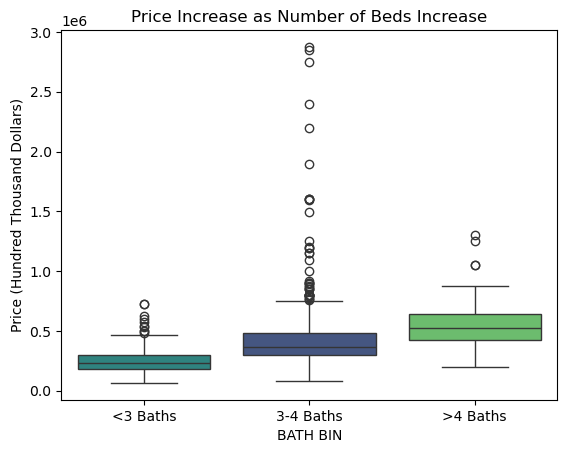

In [34]:
fixed_order_bath = ['<3 Baths', '3-4 Baths', '>4 Baths']
sns.boxplot(y=df['PRICE'], x=df['BATH_BIN'], palette='viridis', hue=df['BED_BIN'], legend=False, order=fixed_order_bath)
plt.title('Price Increase as Number of Beds Increase')
plt.xlabel('BATH BIN')
plt.ylabel('Price (Hundred Thousand Dollars)')
plt.show()

In [35]:
group1_bath = df[df['BATH_BIN'] == '<3 Baths']['PRICE']
group2_bath = df[df['BATH_BIN'] == '3-4 Baths']['PRICE']
group3_bath = df[df['BATH_BIN'] == '>4 Baths']['PRICE']

# 2. Run the One-Way ANOVA
f_stat, p_val = stats.f_oneway(group1_bath, group2_bath, group3_bath)

print(f"F-Statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.4e}")

F-Statistic: 39.13
P-value: 8.1345e-17


In [36]:
tukey = pairwise_tukeyhsd(endog=df['PRICE'], groups=df['BATH_BIN'], alpha=0.05)            
print(tukey)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
  group1   group2    meandiff   p-adj     lower       upper     reject
----------------------------------------------------------------------
3-4 Baths <3 Baths -188271.3657    0.0 -243783.298 -132759.4335   True
3-4 Baths >4 Baths  139510.5861 0.0198  17876.9344  261144.2378   True
 <3 Baths >4 Baths  327781.9519    0.0 201350.0223  454213.8814   True
----------------------------------------------------------------------


In [37]:
tukey = pairwise_tukeyhsd(endog=df['PRICE'], groups=df['BATH_BIN'], alpha=0.01)            
print(tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.01          
  group1   group2    meandiff   p-adj     lower        upper     reject
-----------------------------------------------------------------------
3-4 Baths <3 Baths -188271.3657    0.0 -257359.2377 -119183.4937   True
3-4 Baths >4 Baths  139510.5861 0.0198  -11869.6635  290890.8358  False
 <3 Baths >4 Baths  327781.9519    0.0  170429.9625  485133.9412   True
-----------------------------------------------------------------------


The bathroom set gave very similar data to the bed set. There is likely some creelation between the two. Will check here.

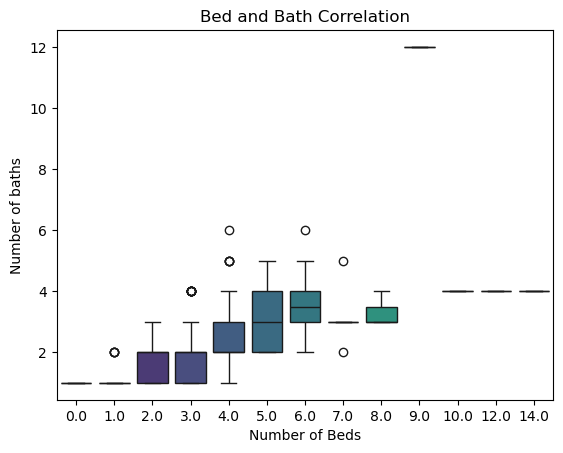

In [38]:
sns.boxplot(y=df['BATHS'], x=df['BEDS'], palette='viridis', hue=df['BEDS'], legend=False)
plt.title('Bed and Bath Correlation')
plt.xlabel('Number of Beds')
plt.ylabel('Number of baths')
plt.show()

Interestingly, the house with 9 beds has 12 baths. Not sure what that developer was thinking.

In [39]:
bednbath_table = df.groupby(['BED_BIN', 'BATH_BIN']).size().unstack(fill_value=0)

print(bednbath_table)

BATH_BIN  3-4 Baths  <3 Baths  >4 Baths
BED_BIN                                
3-5 Beds        454         0         0
<3 Beds           0       201         0
>5 Beds           0         0        31


It looks like the all bath bins fall perfectly in their respective bed bins. This suggests a strong colinearity.

# Housing Type Comaprison to Price

In [40]:
df['PROPERTY TYPE'].value_counts()

PROPERTY TYPE
Single Family Residential    430
Condo/Co-op                  127
Multi-Family (2-4 Unit)       64
Townhouse                     60
Other                          5
Name: count, dtype: int64

In [41]:
property_group_mean_std = (df.groupby('PROPERTY TYPE')['PRICE'].agg(['mean', 'std'])).sort_values(by='mean', ascending=False)
property_group_mean_std = round(property_group_mean_std / 1000, 2)
property_group_mean_std

mean     std
PROPERTY TYPE                            
Single Family Residential  439.30  317.38
Multi-Family (2-4 Unit)    403.26  178.85
Townhouse                  347.96  190.86
Condo/Co-op                287.02  269.93
Other                      184.44   34.26

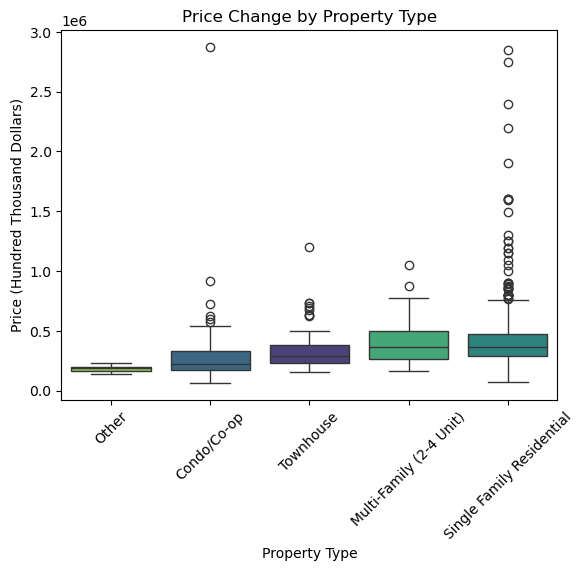

In [42]:
property_type_order = ['Other', 'Condo/Co-op', 'Townhouse', 'Multi-Family (2-4 Unit)', 'Single Family Residential']

sns.boxplot(y=df['PRICE'], x=df['PROPERTY TYPE'], palette='viridis', hue=df['PROPERTY TYPE'], legend=False, order=property_type_order)

plt.title('Price Change by Property Type')
plt.xlabel('Property Type')
plt.xticks(rotation=45)
plt.ylabel('Price (Hundred Thousand Dollars)')
plt.show()

In [43]:
group1_PT = df[df['PROPERTY TYPE'] == 'Other']['PRICE']
group2_PT = df[df['PROPERTY TYPE'] == 'Condo/Co-op']['PRICE']
group3_PT = df[df['PROPERTY TYPE'] == 'Townhouse']['PRICE']
group4_PT = df[df['PROPERTY TYPE'] == 'Multi-Family (2-4 Unit)']['PRICE']
group5_PT = df[df['PROPERTY TYPE'] == 'Single Family Residential']['PRICE']


f_stat, p_val = stats.f_oneway(group1_PT, group2_PT, group3_PT, group4_PT, group5_PT)

print(f"F-Statistic: {f_stat:.2f}")
print(f"P-value: {p_val:.4e}")

F-Statistic: 8.06
P-value: 2.3713e-06


In [44]:
tukey = pairwise_tukeyhsd(endog=df['PRICE'], groups=df['PROPERTY TYPE'], alpha=0.05)            
print(tukey)

                          Multiple Comparison of Means - Tukey HSD, FWER=0.05                          
          group1                    group2            meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------------------------------------
              Condo/Co-op   Multi-Family (2-4 Unit)  116239.8484 0.0659   -4594.0612  237073.758  False
              Condo/Co-op                     Other -102583.4016 0.9362 -461971.8339 256805.0307  False
              Condo/Co-op Single Family Residential  152275.0612    0.0   72667.2835 231882.8389   True
              Condo/Co-op                 Townhouse   60933.9318 0.6601  -62549.1071 184416.9707  False
  Multi-Family (2-4 Unit)                     Other   -218823.25 0.4754 -584850.6083 147204.1083  False
  Multi-Family (2-4 Unit) Single Family Residential   36035.2128 0.8839  -69574.3515 141644.7771  False
  Multi-Family (2-4 Unit)                 Townhouse  -55305.9167

Only Condos vs single family residential are significantly different (p=0.0). Not what I would have expected.

# Housing Location Affects Price

In [45]:
df.head()

PROPERTY TYPE                       ADDRESS              CITY  \
0                  Townhouse  1006 Van White Memorial Blvd       Minneapolis   
1                Condo/Co-op          1211 Lagoon Ave #410       Minneapolis   
2  Single Family Residential              9532 Yosemite Rd       Bloomington   
3                Condo/Co-op     3251 Louisiana Ave S #201  Saint Louis Park   
4                  Townhouse             1315 Douglas Dr N     Golden Valley   

   ZIP OR POSTAL CODE     PRICE  BEDS  BATHS           LOCATION  SQUARE FEET  \
0             55411.0  334900.0   3.0    3.0  Sumner - Glenwood       1505.0   
1             55408.0  219900.0   1.0    1.0    Lowry Hill East        818.0   
2             55437.0  649900.0   4.0    5.0        Bloomington       3492.0   
3             55426.0  424900.0   2.0    2.0   Saint Louis Park       1670.0   
4             55422.0  280000.0   3.0    2.0      Golden Valley       1364.0   

   LOT SIZE  YEAR BUILT  DAYS ON MARKET  $/SQUARE FEET  HOA/MONTH       MLS#  \
0    1306.0        2015               1          223.0      279.0  6678953.0   
1   23391.0        2006               4          269.0      376.0  6762787.0   
2   19166.0        1974              15          186.0        0.0  6752088.0   
3  126890.0        2007              36          254.0      811.0  6744587.0   
4  139304.0        1966              44          205.0      375.0  6739597.0   

    LATITUDE  LONGITUDE   BED_BIN   BATH_BIN  
0  44.988599 -93.291941  3-5 Beds  3-4 Baths  
1  44.948981 -93.294965   <3 Beds   <3 Baths  
2  44.830344 -93.355163  3-5 Beds  3-4 Baths  
3  44.942344 -93.369518   <3 Beds   <3 Baths  
4  44.993391 -93.360514  3-5 Beds  3-4 Baths

In [46]:
df['CITY'].value_counts()

CITY
Saint Paul          265
Minneapolis         183
Brooklyn Park        37
Bloomington          36
Saint Louis Park     30
Maplewood            27
White Bear Twp       20
West Saint Paul      19
Golden Valley        11
Brooklyn Center       9
Crystal               8
Columbia Heights      8
Mahtomedi             7
Richfield             6
Robbinsdale           6
New Hope              5
Saint Anthony         3
Edina                 2
Spring Lake Park      2
White Bear Lake       2
Name: count, dtype: int64

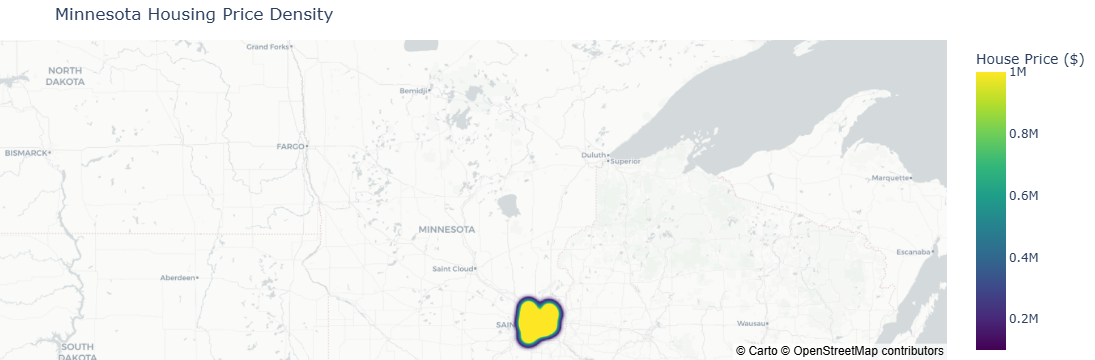

In [47]:
fig = px.density_mapbox(df, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        z="PRICE",
                        radius=12,             # Slightly larger for better "blending"
                        center={"lat": 46.3, "lon": -94.2}, # Centered better for MN
                        zoom=5.5,
                        mapbox_style="carto-positron",     # Cleaner background
                        
                        # NEW REFINEMENTS:
                        color_continuous_scale="Viridis",  # High-contrast color
                        range_color=[100000, 1000000],      # Focus on the $100k-$800k range
                        hover_data=["ZIP OR POSTAL CODE", "PRICE"],   # See details on hover
                        labels={'PRICE': 'House Price ($)'} # Nicer legend label
                       )

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},
                  title="Minnesota Housing Price Density")
fig.show()

Turns out this data is much more focused than I previously thought. Data seems to be dispersed around Minneapolis-Saint Paul area.

It does look like there is a difference for housinig price depending on where it is located. I looks like Saint Paul is the most expensive with Minneapolis being second. Other areas around look to be around the $0.3M mark

# Summary and Conclusions

1. Location has an affect on price

   --This looks to be true according to the Minneapollis -St. Paul map
3. As size increases for the housing unit, so does the price
4. number of beds has an affect on price, likely a price increase
5. number of bathrooms has an affect on price, likely an increase in price

   --All Three of these hypotheses are true, but there is likely a colinearity problem here.
6. Different classes of property types will have different prices (vague I know, but hard to get specific with multiple property types)

   --This hypothesis is likely false with the small caviet of there being a difference between condos and single family homes. 

In [48]:
df.to_csv('MN_Housing_EDA.csv', index=False)